In [46]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

In [47]:
#Import functions notebook and load data set here
from function_notebook_1 import *

In [48]:
df1 = pd.read_csv('data/regularseason15.csv').drop('Unnamed: 0', axis = 1)
df2 = pd.read_csv('data/regularseason16.csv').drop('Unnamed: 0', axis = 1)
df3 = pd.read_csv('data/regularseason17.csv').drop('Unnamed: 0', axis = 1)
df4 = pd.read_csv('data/regularseason18.csv').drop('Unnamed: 0', axis = 1)
df5 = pd.read_csv('data/regularseason19.csv').drop('Unnamed: 0', axis = 1)
df6 = pd.read_csv('data/postseason15.csv').drop('Unnamed: 0', axis = 1)
df7 = pd.read_csv('data/postseason16.csv').drop('Unnamed: 0', axis = 1)
df8 = pd.read_csv('data/postseason17.csv').drop('Unnamed: 0', axis = 1)
df9 = pd.read_csv('data/postseason18.csv').drop('Unnamed: 0', axis = 1)
post_df = pd.read_csv('data/postseason19.csv').drop(['Unnamed: 0','w_loc'], axis = 1)



In [49]:
df=pd.concat([df1,df2,df3,df4,df5],axis=0)
df['tournament']= 0
df = pd.get_dummies(df, columns=['w_loc'], drop_first=True)
df_11=pd.concat([df6,df7,df8,df9],axis=0)
df_11.drop(['w_loc'],axis=1,inplace=True)
df_11['tournament']=1
df_11['w_loc_H'] = 0
df_11['w_loc_N'] = 1
df_train=pd.concat([df,df_11],axis=0)
df_train

,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,W_DR,...,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win,tournament,w_loc_H,w_loc_N
0,1102.0,78.000000,31.000000,62.000000,6.000000,19.000000,10.000000,15.000000,15.000000,17.000000,...,31.000000,0.923077,0.461538,0.047281,0.095238,0.178326,True,0,0,1
1,1119.0,84.000000,30.000000,61.000000,13.000000,25.000000,11.000000,17.000000,17.000000,20.000000,...,22.000000,0.909091,0.434783,0.082305,0.017241,0.173365,True,0,0,1
2,1129.0,81.000000,23.000000,49.000000,6.000000,17.000000,29.000000,44.000000,10.000000,26.000000,...,28.000000,5.333333,0.571429,0.092654,0.056604,0.040161,True,0,0,0
3,1181.0,113.000000,42.000000,69.000000,16.000000,31.000000,13.000000,16.000000,17.000000,29.000000,...,35.000000,1.500000,0.631579,0.039591,0.036364,0.107527,True,0,0,0
4,1218.0,85.000000,31.000000,67.000000,8.000000,24.000000,15.000000,20.000000,18.000000,28.000000,...,31.000000,1.272727,0.388889,0.055646,0.053333,0.110887,True,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1242.0,81.500000,30.117647,60.529412,10.147059,25.205882,11.117647,15.882353,9.558824,25.647059,...,32.727273,1.193955,0.556992,0.068604,0.043542,0.144900,False,1,0,1
63,1437.0,87.058824,31.029412,61.529412,11.411765,28.676471,13.588235,17.617647,9.382353,26.205882,...,31.757576,0.682635,0.476323,0.074531,0.064516,0.192245,True,1,0,1
64,1276.0,73.647059,26.647059,57.235294,8.970588,24.705882,11.382353,17.323529,8.647059,24.676471,...,30.687500,0.881517,0.510288,0.089648,0.059038,0.175713,True,1,0,1
65,1437.0,87.058824,31.029412,61.529412,11.411765,28.676471,13.588235,17.617647,9.382353,26.205882,...,35.147059,0.975113,0.485908,0.070441,0.058795,0.158453,True,1,0,1


In [50]:
post_df['tournament']=1
post_df['w_loc_H'] = 0
post_df['w_loc_N'] = 1

In [51]:
X_train= df_train.drop('fav_win',axis=1)
X_test= post_df.drop('fav_win',axis=1)
y_train= df_train['fav_win']
y_test = post_df['fav_win']
X_train.head()

,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,W_DR,...,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,tournament,w_loc_H,w_loc_N
0,1102.0,78.0,31.0,62.0,6.0,19.0,10.0,15.0,15.0,17.0,...,0.484140,31.0,0.923077,0.461538,0.047281,0.095238,0.178326,0,0,1
1,1119.0,84.0,30.0,61.0,13.0,25.0,11.0,17.0,17.0,20.0,...,0.076263,22.0,0.909091,0.434783,0.082305,0.017241,0.173365,0,0,1
2,1129.0,81.0,23.0,49.0,6.0,17.0,29.0,44.0,10.0,26.0,...,0.278940,28.0,5.333333,0.571429,0.092654,0.056604,0.040161,0,0,0
3,1181.0,113.0,42.0,69.0,16.0,31.0,13.0,16.0,17.0,29.0,...,0.225904,35.0,1.500000,0.631579,0.039591,0.036364,0.107527,0,0,0
4,1218.0,85.0,31.0,67.0,8.0,24.0,15.0,20.0,18.0,28.0,...,0.272109,31.0,1.272727,0.388889,0.055646,0.053333,0.110887,0,1,0


In [52]:
X_test.head()

,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,W_DR,...,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,tournament,w_loc_H,w_loc_N
0,1125.0,86.866667,31.666667,63.733333,10.366667,27.966667,13.166667,17.900000,8.900000,29.666667,...,0.329057,37.156250,0.852941,0.499385,0.068056,0.042034,0.181995,1,0,1
1,1192.0,74.741935,26.193548,55.225806,7.806452,19.322581,14.548387,19.548387,9.225806,23.096774,...,0.293533,37.878788,0.714527,0.520936,0.061329,0.073423,0.213015,1,0,1
2,1113.0,77.812500,26.593750,59.468750,7.250000,21.250000,17.375000,25.906250,12.156250,27.812500,...,0.360050,38.666667,0.882353,0.541516,0.064369,0.039389,0.183694,1,0,1
3,1295.0,72.290323,24.580645,54.709677,9.709677,26.354839,13.419355,17.548387,6.580645,24.193548,...,0.296495,31.033333,1.094708,0.525401,0.077498,0.069175,0.156430,1,0,1
4,1120.0,78.882353,27.029412,60.441176,11.411765,29.970588,13.411765,18.735294,11.735294,21.941176,...,0.338442,28.781250,0.659524,0.381018,0.059872,0.031629,0.174381,1,0,1


In [53]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [54]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Logistic Regression

In [55]:
log_feat=feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)
X_train_best_log = X_train_scaled[log_feat]
X_test_best_log = X_test_scaled[log_feat]

Penalty: l2
Solver: sag
Mean Cross-Val Score: 0.8504357046138612
Train Mean Accuracy: 0.8539048646981728
Test Mean Accuracy: 0.746268656716418
Recall Score: 0.88
Precision Score: 0.8
F1 Score: 0.8380952380952381


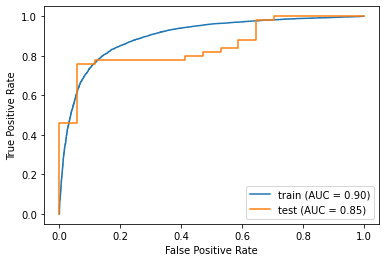

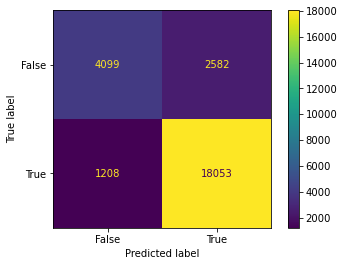

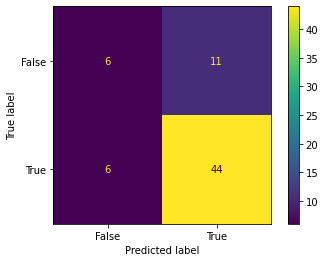

In [56]:
logreg(X_train_best_log, X_test_best_log, y_train, y_test)

### KNN

In [57]:
#knn(X_train_scaled, X_test_scaled, y_train, y_test)

### Decision Tree

In [58]:
#dtree_feats=feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)

In [59]:
#X_train_best_dtree=X_train[dtree_feats]
#X_test_best_dtree=X_test[dtree_feats]

In [60]:
#dtree(X_train_best_dtree, X_test_best_dtree, y_train, y_test)

### Random Forest

In [61]:
random_forest_feat=feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_rforest=X_train_scaled[random_forest_feat]
X_test_best_rforest=X_test_scaled[random_forest_feat]

Number of Trees: 150
Criterion: entropy
Mean Cross-Val Score: 0.8366744981117016
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.8208955223880597
Recall Score: 0.94
Precision Score: 0.8392857142857143
F1 score: 0.8867924528301886


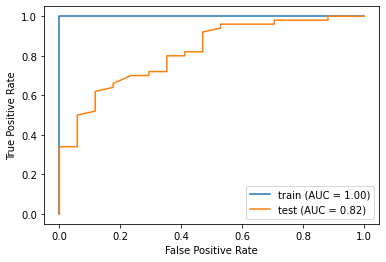

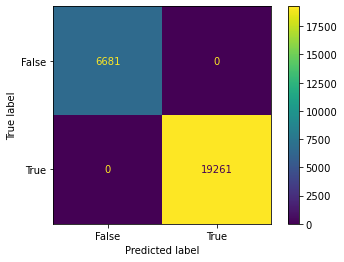

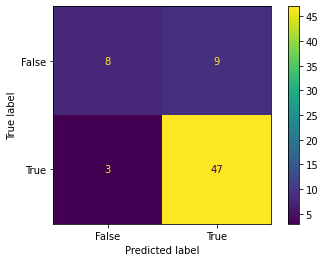

In [62]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

### Bagging Classifier

In [63]:
#bagged(X_train, X_test, y_train, y_test, cv=5)

### XGboost

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 4
XGBoost Min Child Weight: 3
XGBoost Subsample: 1
XGBoost Estimators: 500
Mean Cross-Val Score: 0.8471980865757036
Train Mean Accuracy Score: 0.9192043789993062
Test Mean Accuracy Score: 0.7611940298507462
Recall Score: 0.86
Precision Score: 0.8269230769230769
F1 score: 0.8431372549019608


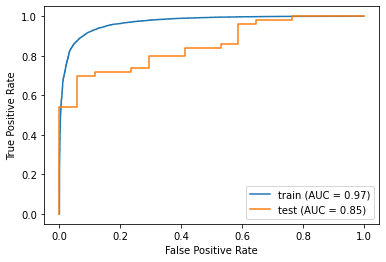

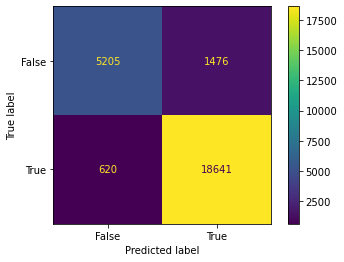

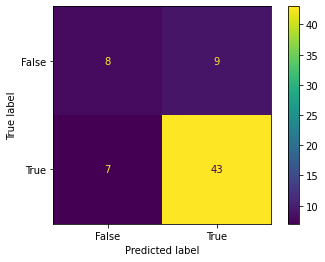

In [64]:
xgboost(X_train, X_test, y_train, y_test, cv=5)